과제1_0518. 타이타닉 데이터셋에 대하여 필요한 전처리를 수행한 후 랜덤포레스트 알고리즘을 적용하여 평가 및 성능 개선을 수행하세요.

In [2]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [6]:
# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할 후 학습 및 예측 import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, pred)     # 데이터 전처리 후 정확도
accuracy_rf
# len(X_test)

0.8603351955307262

In [8]:
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [2, 4, 6],
    'min_samples_leaf': [2, 6, 8, 10, 12, 18],
    'min_samples_split': [2, 4, 8, 12, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)                    # n_jobs = -1 이란, 
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.8174


In [10]:
# 예측 정확도를 높이기 위한 조정

from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [2, 6, 8, 10, 12, 18],
    'min_samples_split': [2, 4, 8, 12, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)                    # n_jobs = -1 이란, 
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
최고 예측 정확도: 0.8259


In [11]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=2, \
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.8771


- 주경님 코드 봐보기. 
- 객체마다 어떻게 다른지, 로지스틱이 가장 높음


--------------------------

- 데이터 전처리에 따라 예측 정확도가 다름. 그리고 모델에 따라 최적 하이퍼 파라미터 조합이 다르기 때문에 다 활용해보기.
- 그러나 가장 중요한 것은 데이터 전처리!!!!!!

과제2_0518. 과제1로부터 변수 중요도를 도출하고 시각화하세요.

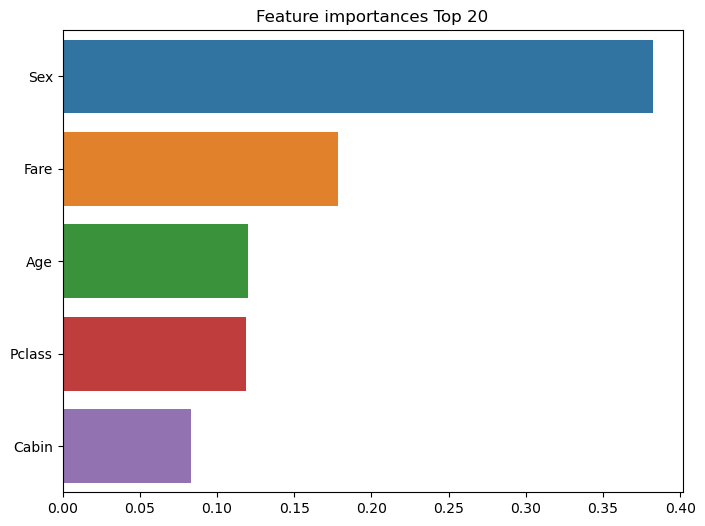

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd. Series (ftr_importances_values, index=X_train.columns) 
ftr_top5 = ftr_importances.sort_values (ascending=False)[:5]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20') 
sns.barplot(x=ftr_top5, y = ftr_top5. index)
plt.show()


# 랜덤포레스트에서 어떤 변수가 중요한지 뽑아낼 수 있음
# 성별이 제일 중요했음
# 그 다음 요금